# SIIM-ISIC Melanoma Classification

This is my solution to the [SIIM-ISIC Melanoma Classification](https://www.kaggle.com/c/siim-isic-melanoma-classification) competition using ResNet34.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
!pip install "torch==1.4" "torchvision==0.5.0"

In [4]:
bs = 64

In [5]:
path = Path('../input/siim-isic-melanoma-classification')
images = path/'jpeg'

In [6]:
data = ImageDataBunch.from_csv(path, folder='jpeg/train', csv_labels='train.csv', label_col=6, size=128, suffix='.jpg')

In [7]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['benign', 'malignant'], 2, 26501, 6625)

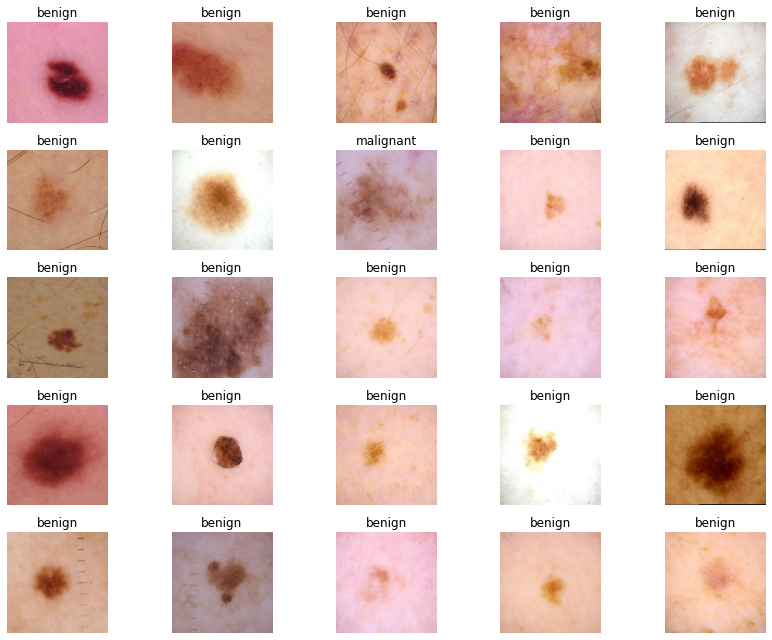

In [8]:
data.show_batch(rows=5, figsize=(12,9))

In [9]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [10]:
lr = 0.01

In [11]:
learn.fit_one_cycle(1, slice(lr))

epoch,train_loss,valid_loss,error_rate,time
0,0.094371,0.080573,0.017811,5:23:30


In [23]:
learn.model_dir = '/kaggle/working'

In [26]:
learn.export('/kaggle/working/export.pkl')

In [28]:
learner = load_learner('/kaggle/working')

In [48]:
img = open_image(images/'test/ISIC_0052060.jpg')


pred_class,pred_idx,outputs = learn.predict(img)

# Get the probability of malignancy

prob_malignant = float(outputs[1]) if str(pred_class) == 'benign' else float(outputs[0])

print(pred_class)
print(prob_malignant)

benign
0.0003679865912999958


In [46]:
test = os.listdir(images/'test')
test.sort(key=lambda f: int(re.sub('\D', '', f)))

with open('/kaggle/working/submission.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['image_name', 'target'])
    
    for image_file in test:
        image = os.path.join(images/'test', image_file) 
        image_name = Path(image).stem

        img = open_image(image)
        pred_class,pred_idx,outputs = learn.predict(img)
        target = float(outputs[1]) if str(pred_class) == 'benign' else float(outputs[0])

        
        writer.writerow([image_name, target])